In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import silhouette_score


In [ ]:
# Step 1: Dimensionality Reduction with PCA
# Load the Olivetti faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data

# Apply PCA to reduce dimensionality while preserving 99% of the variance
pca = PCA(0.99)
X_reduced = pca.fit_transform(X)

In [ ]:
# Step 2: Determine the Most Suitable Covariance Type
covariance_types = ['full', 'tied', 'diag', 'spherical']
best_covariance_type = None
best_silhouette_score = -1

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=0)
    gmm.fit(X_reduced)
    cluster_labels = gmm.predict(X_reduced)
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_covariance_type = cov_type

print(f"Best Covariance Type: {best_covariance_type}")


Best Covariance Type: tied


In [ ]:
# Step 3: Determine the Minimum Number of Clusters
min_clusters = 2
best_aic = np.inf
best_bic = np.inf

for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components, covariance_type=best_covariance_type, random_state=0)
    gmm.fit(X_reduced)
    aic = gmm.aic(X_reduced)
    bic = gmm.bic(X_reduced)

    if aic < best_aic:
        best_aic = aic
        optimal_aic_clusters = n_components

    if bic < best_bic:
        best_bic = bic
        optimal_bic_clusters = n_components

print(f"Optimal Number of Clusters (AIC): {optimal_aic_clusters}")
print(f"Optimal Number of Clusters (BIC): {optimal_bic_clusters}")

Optimal Number of Clusters (AIC): 10
Optimal Number of Clusters (BIC): 2


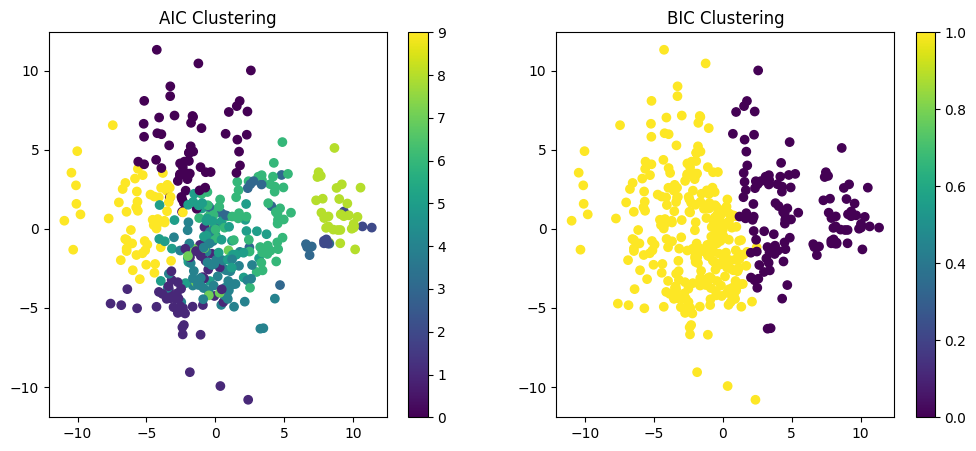

In [ ]:
#  Plot Results
gmm_aic = GaussianMixture(n_components=optimal_aic_clusters, covariance_type=best_covariance_type, random_state=0)
gmm_bic = GaussianMixture(n_components=optimal_bic_clusters, covariance_type=best_covariance_type, random_state=0)

gmm_aic.fit(X_reduced)
gmm_bic.fit(X_reduced)

# Create a scatter plot to visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title("AIC Clustering")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_aic.predict(X_reduced), cmap='viridis')
plt.colorbar()

plt.subplot(122)
plt.title("BIC Clustering")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_bic.predict(X_reduced), cmap='viridis')
plt.colorbar()

plt.show()

In [ ]:
#  Output Hard Clustering for Each Instance
hard_labels_aic = gmm_aic.predict(X_reduced)
hard_labels_bic = gmm_bic.predict(X_reduced)

In [ ]:
# Output Soft Clustering for Each Instance
soft_probabilities_aic = gmm_aic.predict_proba(X_reduced)
soft_probabilities_bic = gmm_bic.predict_proba(X_reduced)

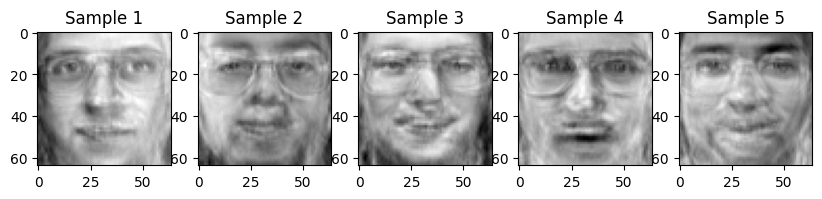

In [ ]:
#  Generate New Faces and Visualize
# Create a GMM model with the best parameters for generating new faces
gmm_best = GaussianMixture(n_components=optimal_aic_clusters, covariance_type=best_covariance_type, random_state=0)
gmm_best.fit(X_reduced)

# Generate new faces in the reduced PCA space
n_samples = 5  # Number of new faces to generate
generated_samples_pca = gmm_best.sample(n_samples)[0]

# Transform generated samples back to the original space
generated_samples = pca.inverse_transform(generated_samples_pca)

# Visualize the generated faces
plt.figure(figsize=(10, 5))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(generated_samples[i].reshape(64, 64), cmap='gray')
    plt.title(f'Sample {i + 1}')
plt.show()

In [ ]:
#  Modify Images (e.g., rotate, flip, darken)
# You can apply various image transformations here.
noisy_X = X + np.random.normal(0, 0.1, X.shape)

In [ ]:
#  Detect Anomalies
# Create a GMM model for anomaly detection
gmm_anomaly = GaussianMixture(n_components=optimal_aic_clusters, covariance_type=best_covariance_type, random_state=0)
gmm_anomaly.fit(X_reduced)

# Compare the log-likelihood of the original and modified images using the score_samples method.
log_likelihood_original = gmm_anomaly.score_samples(X_reduced)
log_likelihood_noisy = gmm_anomaly.score_samples(pca.transform(noisy_X))

# Define a threshold to determine anomalies
threshold = -5  # Define your threshold based on your data and experiment.

anomalies = np.where(log_likelihood_noisy < threshold)[0]
print(f"Detected anomalies: {anomalies}")

Detected anomalies: [  0   3   4   5   6   7   8   9  10  11  12  13  14  16  19  20  21  23
  28  29  30  31  32  33  34  35  36  37  38  41  42  43  49  50  51  53
  54  55  56  57  58  60  62  63  64  65  67  68  69  70  71  72  74  76
  77  78  80  81  83  84  85  87  88  89  90  92  95  96  99 100 101 102
 103 104 106 107 108 109 110 112 115 116 117 118 119 120 121 122 123 124
 128 130 132 134 135 136 137 138 140 141 143 144 145 147 148 149 150 151
 153 154 155 156 158 159 160 161 163 164 166 167 168 169 170 171 172 173
 175 176 178 179 180 184 185 186 187 188 189 190 192 193 194 195 196 197
 198 202 203 204 205 206 207 208 209 211 213 215 216 217 218 219 220 221
 222 223 224 225 226 228 230 231 232 233 234 235 237 238 239 240 241 242
 243 244 246 247 250 251 252 255 256 257 260 261 262 263 265 266 267 269
 273 276 278 279 280 281 282 283 285 286 287 288 289 290 291 292 293 295
 296 297 299 300 301 302 303 304 305 306 307 308 310 311 313 314 315 316
 317 318 319 320 322 323 324 32